<a href="https://colab.research.google.com/github/danielduartt/Fundamentos-DataScience/blob/main/Projeto_II_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto II
esse projeto tem como objetivo responder algumas perguntas relaciona a base de dados que se encontra no link abaixo:
* https://www.kaggle.com/datasets/amanarora/obesity-among-adults-by-country-19752016

##Algumas observações sobre o DataSet
About Dataset
Obesity among adults dataset by WHO, from year 1975 to year 2016

Dataset obtained from https://apps.who.int/gho/data/node.main.A900A?lang=en

I have added both raw downloaded file from WHO and a cleaned version for direct use for Exploratory Data Analysis and Visualizations.

Do check out my own kernel where I have cleaned and re-structured the raw version.

Thanks!

---
Sobre o conjunto de dados
Conjunto de dados da OMS sobre obesidade entre adultos, do ano de 1975 ao ano de 2016

Conjunto de dados obtido em https://apps.who.int/gho/data/node.main.A900A?lang=en

Adicionei o arquivo bruto baixado da OMS e uma versão limpa para uso direto em análises e visualizações exploratórias de dados.

Dê uma olhada no meu próprio kernel, onde limpei e reestruturei a versão bruta.

Obrigado!


###Primeiro passo (importação das bibliotecas que serão utilizadas e importação do dataset que será utilizado)

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/content/obesity_cleaned.csv")
df.head()

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


In [6]:
df.drop("Unnamed: 0", axis = 1, inplace = True) #Percebo que há uma coluna desnecessária, a qual desejo excluir
df

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [7]:
df.info

<bound method DataFrame.info of            Country  Year       Obesity (%)         Sex
0      Afghanistan  1975     0.5 [0.2-1.1]  Both sexes
1      Afghanistan  1975     0.2 [0.0-0.6]        Male
2      Afghanistan  1975     0.8 [0.2-2.0]      Female
3      Afghanistan  1976     0.5 [0.2-1.1]  Both sexes
4      Afghanistan  1976     0.2 [0.0-0.7]        Male
...            ...   ...               ...         ...
24565     Zimbabwe  2015     4.5 [2.4-7.6]        Male
24566     Zimbabwe  2015  24.8 [18.9-31.3]      Female
24567     Zimbabwe  2016  15.5 [12.0-19.2]  Both sexes
24568     Zimbabwe  2016     4.7 [2.5-8.0]        Male
24569     Zimbabwe  2016  25.3 [19.1-32.0]      Female

[24570 rows x 4 columns]>

In [8]:
df.memory_usage()

Index             128
Country        196560
Year           196560
Obesity (%)    196560
Sex            196560
dtype: int64

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [9]:
df['Obesity (%)']

0           0.5 [0.2-1.1]
1           0.2 [0.0-0.6]
2           0.8 [0.2-2.0]
3           0.5 [0.2-1.1]
4           0.2 [0.0-0.7]
               ...       
24565       4.5 [2.4-7.6]
24566    24.8 [18.9-31.3]
24567    15.5 [12.0-19.2]
24568       4.7 [2.5-8.0]
24569    25.3 [19.1-32.0]
Name: Obesity (%), Length: 24570, dtype: object

In [10]:
df['Obesity'] = df['Obesity (%)'].apply(lambda  x : x.split(" ")[0])

In [11]:
df['Obesity'].value_counts()

No      504
0.4     222
0.6     218
0.5     217
0.7     210
       ... 
60.1      1
56.3      1
59.8      1
55.5      1
46.5      1
Name: Obesity, Length: 602, dtype: int64

In [12]:
df.loc[df['Obesity'] == "No", "Obesity"] = np.nan
df['Obesity'] = df['Obesity'].dropna()

In [13]:
df['Obesity'] = df['Obesity'].apply(lambda x: float(x))
df['Year'] = df['Year'].apply(lambda x: int(x))

In [14]:
df.set_index('Year', inplace = True)
df

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...
2015,Zimbabwe,4.5 [2.4-7.6],Male,4.5
2015,Zimbabwe,24.8 [18.9-31.3],Female,24.8
2016,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


In [15]:
df.drop('Obesity (%)', axis=1, inplace = True)

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [16]:
group_sex = df[df.index == 2015].groupby('Sex').mean()
group_sex

<ipython-input-16-bc9496877777>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_sex = df[df.index == 2015].groupby('Sex').mean()


,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


In [17]:
import plotly.express as px
px.pie(group_sex, names=group_sex.index, values="Obesity",
       title="Gráfico de Pizza: Percentual médio de Obesidade por sexo no ano de 2015")


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [18]:
df_start = df[df.index == 1975]
df_end   = df[df.index == 2016]

In [19]:
df_start

,Country,Sex,Obesity
Year,,,
1975,Afghanistan,Both sexes,0.5
1975,Afghanistan,Male,0.2
1975,Afghanistan,Female,0.8
1975,Albania,Both sexes,6.5
1975,Albania,Male,4.4
...,...,...,...
1975,Zambia,Male,0.5
1975,Zambia,Female,2.5
1975,Zimbabwe,Both sexes,3.7


In [20]:
df_start.set_index('Country', inplace = True)
df_end.set_index("Country", inplace = True)

In [25]:
df_ev = df_end[df_end['Sex'] == 'Both sexes']['Obesity'] - df_start[df_start['Sex'] == 'Both sexes']['Obesity']
df_ev # evolução dos crescimentos

Country
Afghanistan                            5.0
Albania                               15.2
Algeria                               20.5
Andorra                               12.7
Angola                                 7.4
                                      ... 
Venezuela (Bolivarian Republic of)    16.0
Viet Nam                               2.0
Yemen                                 14.3
Zambia                                 6.6
Zimbabwe                              11.8
Name: Obesity, Length: 195, dtype: float64

In [29]:
df_ev.sort_values().dropna().head() #menor evolução

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [31]:
df_ev.sort_values().dropna().tail() #maior evolução

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?


In [33]:
df_2015 = df[df.index == 2015]

63.1

In [35]:
df_2015[df_2015['Obesity'] == df_2015['Obesity'].max()]

,Country,Sex,Obesity
Year,,,
2015,Nauru,Female,63.1


In [36]:
df_2015[df_2015['Obesity'] == df_2015['Obesity'].min()]

,Country,Sex,Obesity
Year,,,
2015,Viet Nam,Male,1.5


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [61]:
df_brasil = df[df['Country'] == 'Brazil']
df_brasil

,Country,Sex,Obesity
Year,,,
1975,Brazil,Both sexes,5.2
1975,Brazil,Male,3.0
1975,Brazil,Female,7.3
1976,Brazil,Both sexes,5.5
1976,Brazil,Male,3.2
...,...,...,...
2015,Brazil,Male,18.0
2015,Brazil,Female,24.9
2016,Brazil,Both sexes,22.1


In [65]:
df_ev_br = df_brasil[df_brasil['Sex'] == 'Female']['Obesity'] - df_brasil[df_brasil['Sex'] == 'Male']['Obesity']

<Axes: xlabel='Year'>

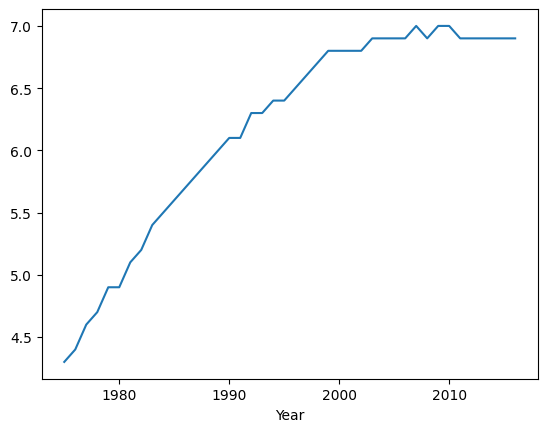

In [67]:
df_ev_br.plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [75]:
df_both = df[df['Sex'] == "Both sexes"]

<ipython-input-77-3275a2d25809>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='Year'>

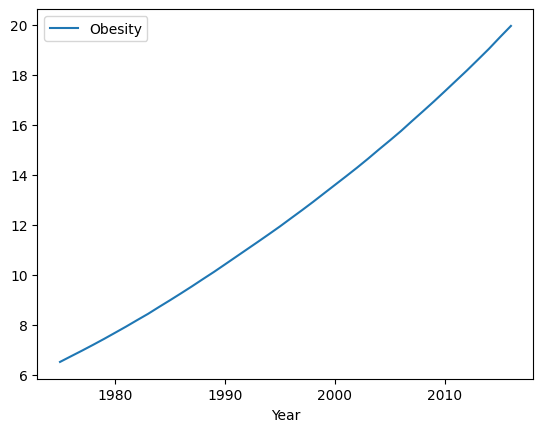

In [77]:
df_both.groupby('Year').mean().plot()